<b>Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# <b>Часть первая </b>
Приоритизация гипотез

In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
data['ICE'] = (data['Impact']*data['Confidence'])/data['Efforts']
print(data[['Hypothesis','ICE']].sort_values('ICE',ascending=False))

                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [6]:
data['RICE'] = (data['Reach']*data['Impact']*data['Confidence'])/data['Efforts']
print(data[['Hypothesis','RICE']].sort_values('RICE',ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Как можно заметить фреймворк RICE вынес на первое место гипотезу с индексом 7, превышая предыдущую гипотезу в два раза. Такой приоритет появился из-за параметра охвата, гипотеза с индексом 7 имеет наивысший охват и хорошие другие показатели, поэтому она должна быть выполнена первой, а после нее следует гипотеза с индексом 2, у которой охват оценивается в 8 баллов и тоже хорошие другие показатели. По фреймворку ICE лидирует гипотеза с индексом 8, но фреймворк не учитывает охват, который очень низко оценен у данной гипотезы. Гипотеза с индексом 8 вносит огромное влияние на пользователей и их удовлетворенность, но стоит дорого и затронет очень маленькое количество пользователей, поэтому она не эффективна. Фреймворк RICE более качественно оценивает гипотезы.

# <b>Часть вторая</b>
Анализ A/B теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
display(orders.head(), visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Для удобства переименуем некоторые колонки

In [9]:
orders = orders.rename(columns={'transactionId':'orderId','visitorId':'userId'})

In [10]:
print(orders.info(), visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   orderId  1197 non-null   int64 
 1   userId   1197 non-null   int64 
 2   date     1197 non-null   object
 3   revenue  1197 non-null   int64 
 4   group    1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None None


In [11]:
print(orders['group'].value_counts(),visitors['group'].value_counts())

B    640
A    557
Name: group, dtype: int64 A    31
B    31
Name: group, dtype: int64


Никаких проблем в группах не обнаружено, группы поделены равно

In [12]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Переведем дату к удобному формату

Переходим к агрегации требуемых данных

In [13]:
# массив уникальных пар значений дат и групп теста методом
datesGroups = orders[['date', 'group']].drop_duplicates()

In [14]:
# агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

### График кумулятивной выручки по группам

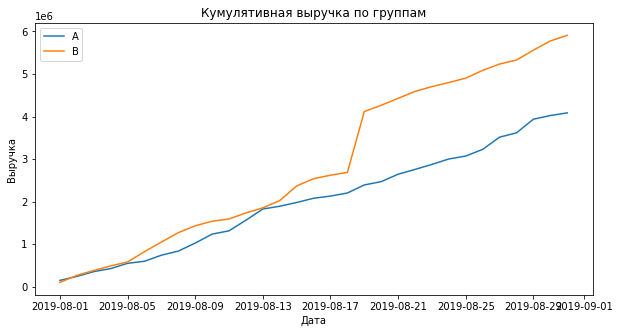

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Группа B показывает себя очень хорошо на протяжении всего теста, но имеется резкий всплеск выручки в середине теста, возможно аномально дорогие заказы повлияли на это. Тенденция лидерства группы B прослеживается на протяжении всего теста.

### График кумулятивного среднего чека по группам

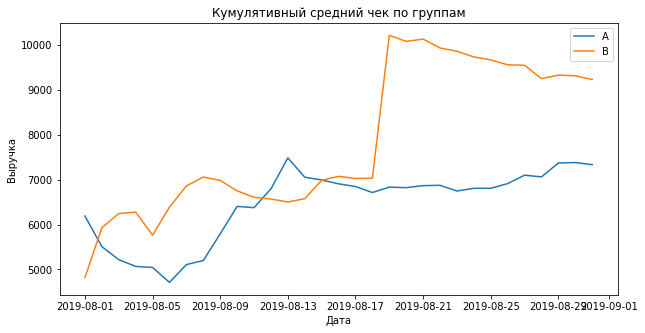

In [17]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 
plt.show()

Заметны колебания значений и резкий всплеск в одной из групп, потребуется рассмотреть аномалии, возможно, заметное влияние на средний чек.

### График относительного изменения кумулятивного среднего чека группы B к группе A

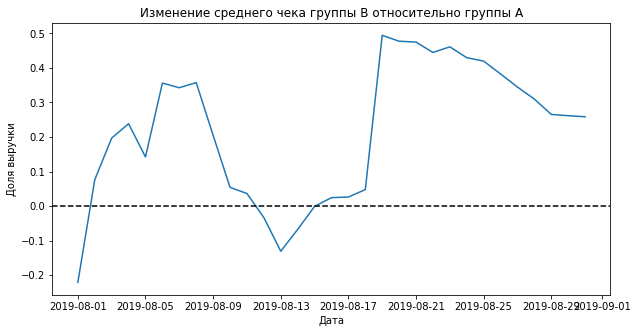

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', suffixes=['A','B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0,color='black',linestyle='--')
plt.title('Изменение среднего чека группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Доля выручки')
plt.show()

Имеются резкие скачки, что говорит о аномальных заказах в некоторые даты.

### График кумулятивной конверсии по группам

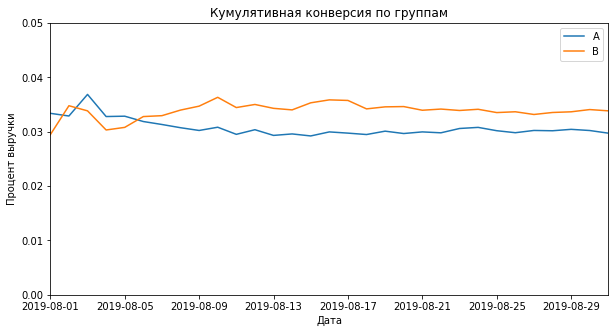

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'],cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['conversion'],label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Процент выручки')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

Конверсия группы B после 5 дня начала возрастать и превысила конверсию группы A, после чего зафиксировалась примерно около одного значения выше конверсии группы A

### График относительного изменения кумулятивной конверсии группы B к группе A

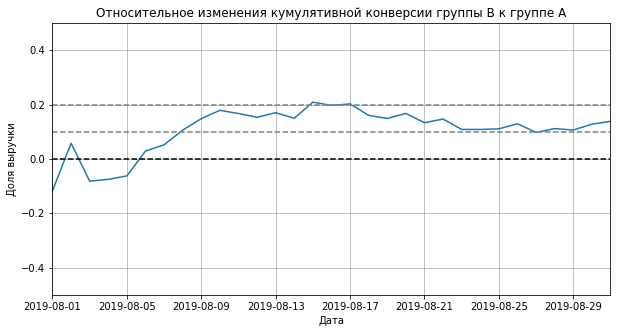

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A','B'] )
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля выручки')
plt.grid()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 15% относительно группы A.

### Точечный график количества заказов по пользователям

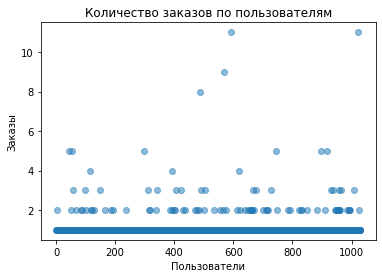

In [31]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x=x_values, y=ordersByUsers['orders'], alpha=0.5)
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы');

Имеются некоторое количество аномальных заказов, но в освновном 3 заказа для пользователя это предел, очень малый процент пользователей заказывают больше

### 95-й и 99-й перцентили количества заказов на пользователя

In [34]:
print(np.percentile(ordersByUsers['orders'],[95,99]))
# запомним число для фильтрациии
orderfilter=np.percentile(ordersByUsers['orders'],99)

[2. 4.]


Подтверждение графика заказов, лишь 5% пользователей делают 3 и больше заказа, и только 1% 4 и больше, будем считать что аномально большое количество заказов больше 3

### Точечный график стоимостей заказов

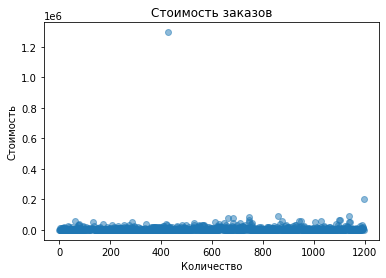

In [36]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x=x_values, y=orders['revenue'], alpha=0.5)
plt.title('Стоимость заказов')
plt.xlabel('Количество')
plt.ylabel('Стоимость');

По такому графику тяжело сказать сколько в среднем стоит заказ, но зато заметны некоторые аномально дорогие заказы, которые точно нужно будет отсечь

### 95-й и 99-й перцентили стоимости заказов

In [38]:
print(np.percentile(orders['revenue'],[95,99]))
pricefilter = np.percentile(orders['revenue'],99)

[28000.  58233.2]


За аномальные можно будет считать заказы дороже 58233.2, чтобы быть отсечь приблизительно 1% пользователей c аномально большими заказами

# <b>Гипотезы</b>

<b>Гипотеза о равенстве конверсии между группами</b>

Нулевая гипотеза: различий в конверсии между группами нет.

Альтернативная гипотеза: различия в конверсии между группами есть.

Уровень статистической значимости: <b>0.05</b>

<b>Гипотеза об отсутствии различий в среднем чеке между сегментами</b>

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

Уровень статистической значимости: <b>0.05</b>

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# Число заказов пользователей группы А, совершивших хотя бы 1 заказ
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
# Число заказов пользователей группы В, совершивших хотя бы 1 заказ
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
# Выборки из групп, где пользователю соответствует его число заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value =',round(stats.mannwhitneyu(sampleA,sampleB)[1],5))
print('Коверсия группы B к группе А','{0:.1%}'.format(sampleB.mean()/sampleA.mean()-1))

P-value = 0.01679
Коверсия группы B к группе А 13.8%


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [40]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'])[1]))
print('Средн.чек B к А','{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.729
Средн.чек B к А 25.9%


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. А вот относительное различие среднего чека между сегментами составляет 25.9%, что вероятнее всего говорит о наличии аномалий

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Аномальными значениями будут считаться пользователи либо с числом заказов больше 3, либо со стоимостью заказа больше 40000

In [41]:
# Срез с пользователями с большим количеством заказов
usersWithManyOrders = pd.concat([
    ordersByUsersA[ordersByUsersA['orders'] >= orderfilter]['userId'], ordersByUsersB[ordersByUsersB['orders'] >= orderfilter]['userId']
], axis=0)
# Срез с пользователями с очень дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > pricefilter]['userId']
# Соеденим срезы, что фильтровать по ним данные
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders],axis=0).drop_duplicates().sort_values()
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered,sampleBFiltered)[1]))
print('{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01390
15.10%


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [42]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.959
-1.39%


Статистической значимости не появилось, зато различие в среднем чеке после удаления шума стало отрицательным. Различие в -1% выручки не является значимым, возможо что-то еще влияет на выручку, либо она может колебаться в силу какого-то фактора.

### Решение по результатам теста

<b>Подведем итоги: </b>
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
* Как по сырым данным, так и после удаления аномалий статистически значимого различия по среднему чеку между группами не появилось. Но относительное различие среднего чека между сегментами составило -1%, средний чек группы B проигрывает среднему чеку группы A, но средний чек может быть различным в каждый период времени.
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* График различия среднего чека колеблется, что говорит о наличии аномалий.

Исходя из всего вышеперечисленного, можно с уверенностью сказать,что тест удался и группа B лучше группы A, можно останавливать тест.